In [1]:
!pip install networkx
!pip install torch
!pip install scipy>=1.8
#!pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx
import matplotlib.pyplot as plt #needed to visualize loss curves
import numpy as np 
import pandas as pd
import csv
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [3]:
G = nx.read_edgelist('wiki-vote.txt', create_using=nx.DiGraph())

In [4]:
from sklearn.model_selection import train_test_split

# Split the edges into training and test sets, with 20% of edges used for testing
edges_train, edges_test = train_test_split(list(G.edges()), test_size=0.2, random_state=42)

# Create separate subgraphs for training and testing, using only the edges in the corresponding set
G_train = G.edge_subgraph(edges_train)
G_test = G.edge_subgraph(edges_test)

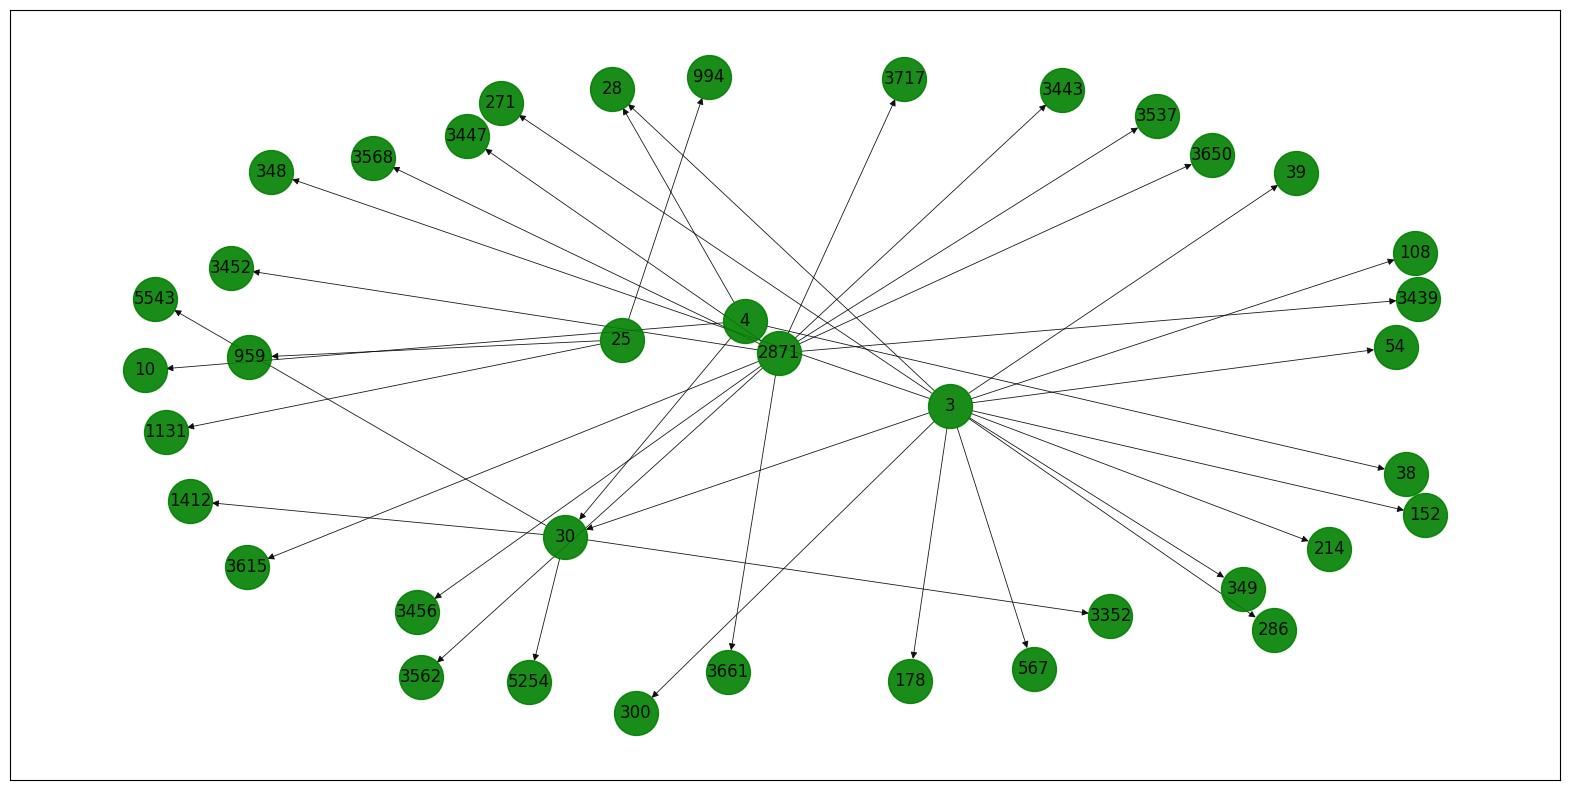

In [5]:
plt.figure(figsize=(20,10))
posn = nx.spring_layout(G)
nx.draw_networkx(nx.relabel_nodes(G_train, nx.get_node_attributes(G_train, 'text')),with_labels=True, node_color='green',node_size = 1000, alpha = 0.9, width = 0.6, pos = posn)
#nx.draw(nx.relabel_nodes(G,'text') with_labels=True, node_color='green',node_size = 60, alpha = 0.9, width = 0.6, pos = posn)
plt.show()

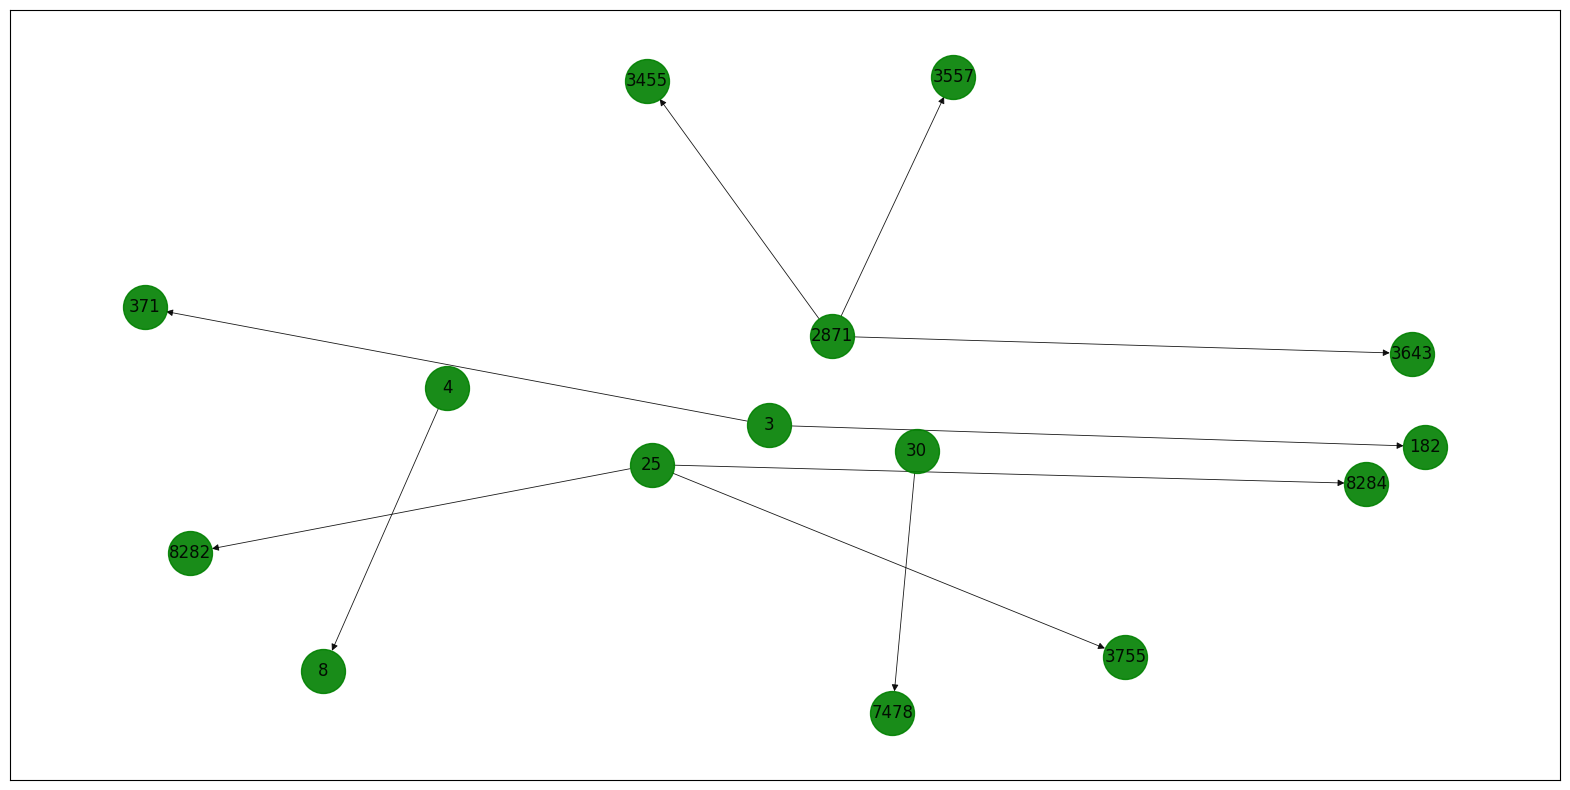

In [6]:
plt.figure(figsize=(20,10))
posn = nx.spring_layout(G)
nx.draw_networkx(nx.relabel_nodes(G_test, nx.get_node_attributes(G_test, 'text')),with_labels=True, node_color='green',node_size = 1000, alpha = 0.9, width = 0.6, pos = posn)
#nx.draw(nx.relabel_nodes(G,'text') with_labels=True, node_color='green',node_size = 60, alpha = 0.9, width = 0.6, pos = posn)
plt.show()

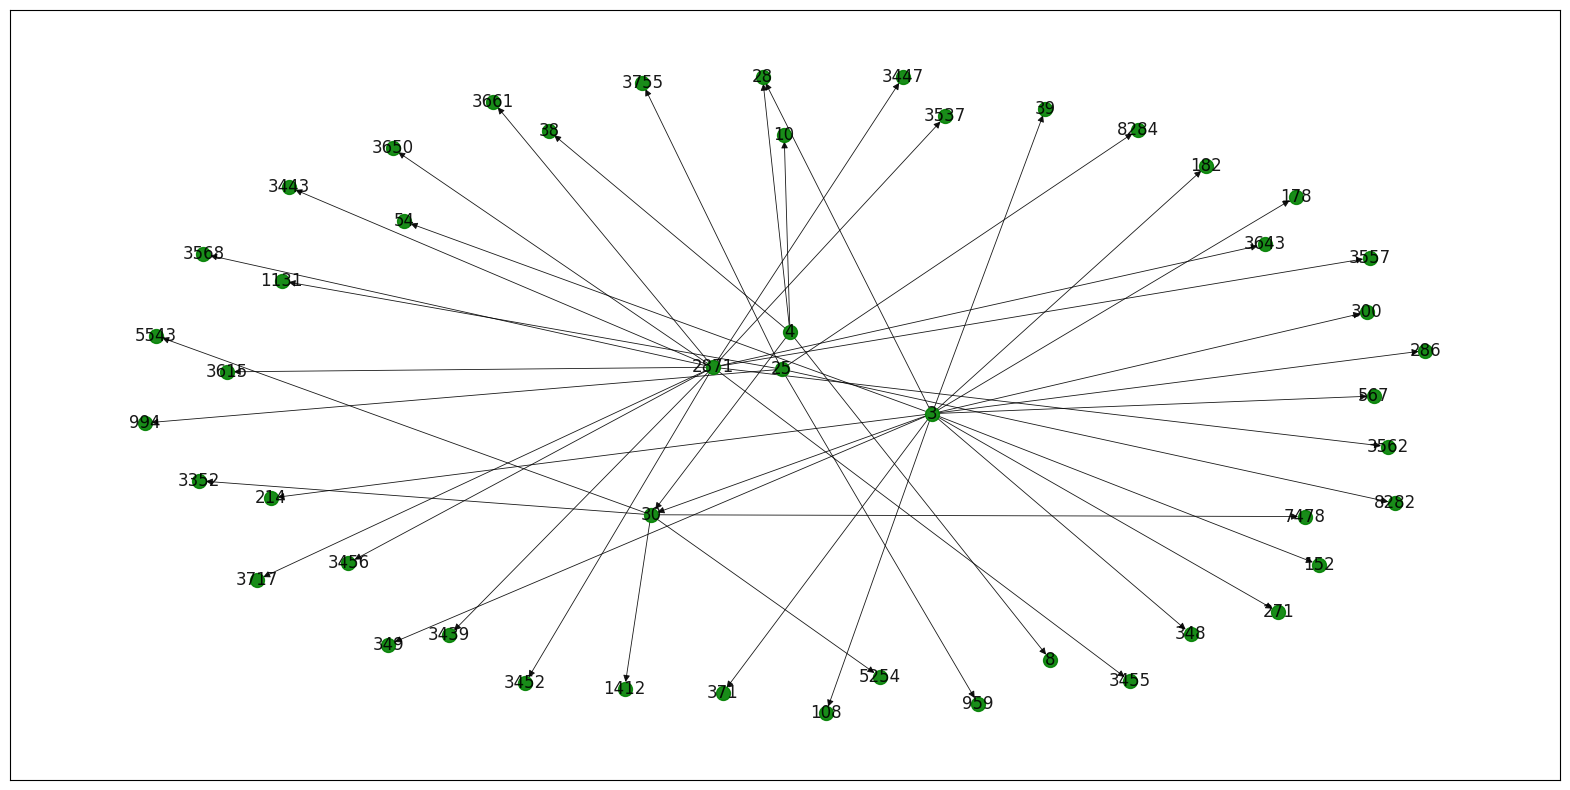

In [7]:
plt.figure(figsize=(20,10))
posn = nx.spring_layout(G)
nx.draw_networkx(nx.relabel_nodes(G, nx.get_node_attributes(G, 'text')),with_labels=True, node_color='green',node_size = 100, alpha = 0.9, width = 0.6, pos = posn)
#nx.draw(nx.relabel_nodes(G,'text') with_labels=True, node_color='green',node_size = 60, alpha = 0.9, width = 0.6, pos = posn)
plt.show()

In [8]:
# Load the graph from a file
#G = nx.read_edgelist('wiki-vote.txt', create_using=nx.DiGraph())
#df = pd.DataFrame(features_list)

# Create a CSV file to write the features
with open('features.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['node1', 'node2','Ind1', 'Ind2', 'Od1', 'Od2','DC1','DC2','BC1','BC2','UN','SIM','is_edge'])
    
    # Create a dictionary to map URLs to node IDs
    url_to_node = {}
    node_id = 0
    
    for u in G_train.nodes():
        if u not in url_to_node:
            url_to_node[u] = node_id
            node_id += 1
        
    for u in G_train.nodes():
        for v in G_train.nodes():

            # Calculate the features
            if u != v:
                #jaccard_coeff = nx.jaccard_coefficient(G, [(node1, node2)])
                indegree1 = G_train.in_degree(u)
                indegree2 = G_train.in_degree(v)
                outdegree1 = G_train.out_degree(u)
                outdegree2 = G_train.out_degree(v)
                #common_neighbours = len(list(nx.common_neighbors(G, node1, node2)))
                degree_centrality = nx.degree_centrality(G_train)
                #eigenvector_centrality = nx.eigenvector_centrality(G)
                betweenness_centrality = nx.betweenness_centrality(G_train)   

                union_neighbours = len(set(G_train.neighbors(u)).union(G_train.neighbors(v)))
                similarity = nx.simrank_similarity(G_train, u, v)
                is_edge = G_train.has_edge(u, v)
                #path_length = nx.shortest_path_length(G, u, v)
                #katz_uv = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart={u:1, v:1})[u] + nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart={u:1, v:1})[v]
                # Node similarity feature
                #pa = nx.preferential_attachment(G, [(node1,node2)])
                #katz = nx.katz_similarity_numpy(G, alpha=alpha, max_iter=1000)[node1][node2]
                # Temporal features (assuming a temporal attribute 'time' is attached to each edge)
                #time_diff = abs(G[u][v]['time'])
                #freq_interactions = len(list(G.in_edges(node1))) + len(list(G.out_edges(node1))) + len(list(G.in_edges(node2))) + len(list(G.out_edges(node2)))
                #rate_change = (len(list(G.in_edges(node1))) + len(list(G.out_edges(node1)))) / (G.nodes[node1]['time'] - G.nodes[node2]['time'])
                
                # Replace the URLs with node IDs
                u_id = url_to_node[u]
                v_id = url_to_node[v]

                # Write the features to the CSV file
                writer.writerow([u_id, v_id, indegree1, indegree2, outdegree1, outdegree2,degree_centrality[u],degree_centrality[v], betweenness_centrality[u], betweenness_centrality[v], union_neighbours,similarity,is_edge])


In [9]:
# Load the graph from a file
#G = nx.read_edgelist('wiki-vote.txt', create_using=nx.DiGraph())
#df = pd.DataFrame(features_list)

# Create a CSV file to write the features
with open('featurestest.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['node1', 'node2','Ind1', 'Ind2', 'Od1', 'Od2','DC1','DC2','BC1','BC2','UN','SIM','is_edge'])
    
    # Create a dictionary to map URLs to node IDs
    url_to_node = {}
    node_id = 0
    
    for u in G_test.nodes():
        if u not in url_to_node:
            url_to_node[u] = node_id
            node_id += 1
        
    for u in G_test.nodes():
        for v in G_test.nodes():

            # Calculate the features
            if u != v:
                #jaccard_coeff = nx.jaccard_coefficient(G, [(node1, node2)])
                indegree1 = G_test.in_degree(u)
                indegree2 = G_test.in_degree(v)
                outdegree1 = G_test.out_degree(u)
                outdegree2 = G_test.out_degree(v)
                #common_neighbours = len(list(nx.common_neighbors(G, node1, node2)))
                degree_centrality = nx.degree_centrality(G_test)
                #eigenvector_centrality = nx.eigenvector_centrality(G)
                betweenness_centrality = nx.betweenness_centrality(G_test)   

                union_neighbours = len(set(G_test.neighbors(u)).union(G_test.neighbors(v)))
                similarity = nx.simrank_similarity(G_test, u, v)
                is_edge = G_test.has_edge(u, v)
                #path_length = nx.shortest_path_length(G, u, v)
                #katz_uv = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart={u:1, v:1})[u] + nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart={u:1, v:1})[v]
                # Node similarity feature
                #pa = nx.preferential_attachment(G, [(node1,node2)])
                #katz = nx.katz_similarity_numpy(G, alpha=alpha, max_iter=1000)[node1][node2]
                # Temporal features (assuming a temporal attribute 'time' is attached to each edge)
                #time_diff = abs(G[u][v]['time'])
                #freq_interactions = len(list(G.in_edges(node1))) + len(list(G.out_edges(node1))) + len(list(G.in_edges(node2))) + len(list(G.out_edges(node2)))
                #rate_change = (len(list(G.in_edges(node1))) + len(list(G.out_edges(node1)))) / (G.nodes[node1]['time'] - G.nodes[node2]['time'])
                
                # Replace the URLs with node IDs
                u_id = url_to_node[u]
                v_id = url_to_node[v]

                # Write the features to the CSV file
                writer.writerow([u_id, v_id, indegree1, indegree2, outdegree1, outdegree2,degree_centrality[u],degree_centrality[v], betweenness_centrality[u], betweenness_centrality[v], union_neighbours,similarity,is_edge])


In [10]:
import pandas as pd

# Load the feature matrix and target vector for the training graph
df_train = pd.read_csv('features.csv', index_col=0)

# Split the feature matrix and target vector
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values

# Load the feature matrix and target vector for the test graph
df_test = pd.read_csv('featurestest.csv', index_col=0)

# Split the feature matrix and target vector
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values


In [11]:
from sklearn.preprocessing import LabelBinarizer

# Convert the target vector to binary form
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)


In [12]:
# Oversample Class 1 using the SMOTE algorithm
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_resampled.shape[1]),
    tf.keras.layers.Dropout(0.2), # add dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add another dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add another dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add another dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data and save the training history
history = model.fit(X_train_resampled, y_train_resampled, epochs=50, validation_data=(X_test, y_test))

# Print the training and validation accuracy for each epoch
print(history.history['accuracy'])
print(history.history['val_accuracy'])


Epoch 1/50
91/91 [==============================] - 2s 4ms/step - loss: 0.4173 - accuracy: 0.8270 - val_loss: 0.3841 - val_accuracy: 0.7714
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9363 - val_loss: 0.3252 - val_accuracy: 0.7714
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9453 - val_loss: 0.2510 - val_accuracy: 0.8000
Epoch 4/50
91/91 [==============================] - 0s 3ms/step - loss: 0.1596 - accuracy: 0.9526 - val_loss: 0.3042 - val_accuracy: 0.7905
Epoch 5/50
91/91 [==============================] - 0s 3ms/step - loss: 0.1531 - accuracy: 0.9564 - val_loss: 0.2976 - val_accuracy: 0.7905
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9567 - val_loss: 0.2653 - val_accuracy: 0.8238
Epoch 7/50
91/91 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9529 - val_loss: 0.2677 - val_accuracy: 0.8095
Epoch 8/50
91/91 [==

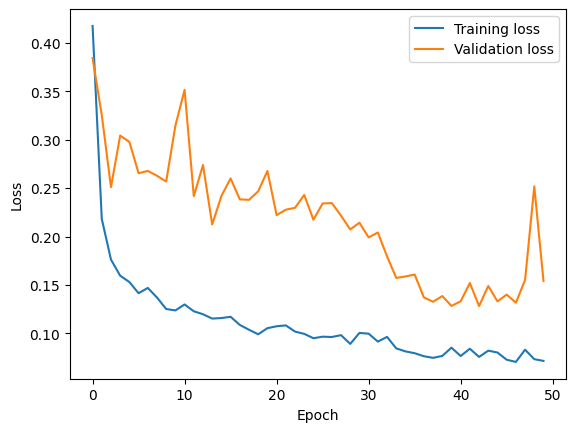

In [15]:
# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

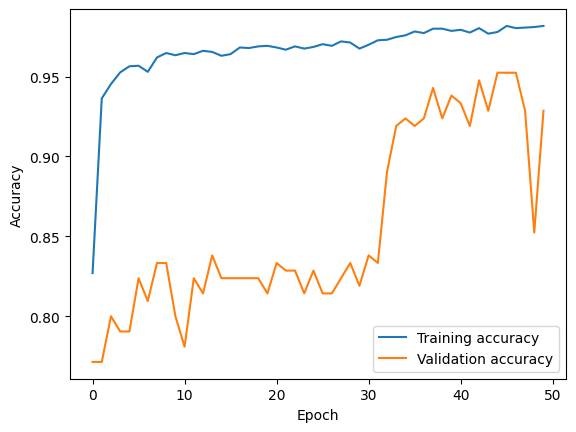

In [16]:
# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Predict the edges using the trained model
y_pred = model.predict(X_test)

# Convert the predicted probabilities to binary form using a threshold of 0.5
y_pred_binary = (y_pred > 0.3).astype(int)


7/7 [==============================] - 0s 1ms/step


47/47 [==============================] - 0s 743us/step


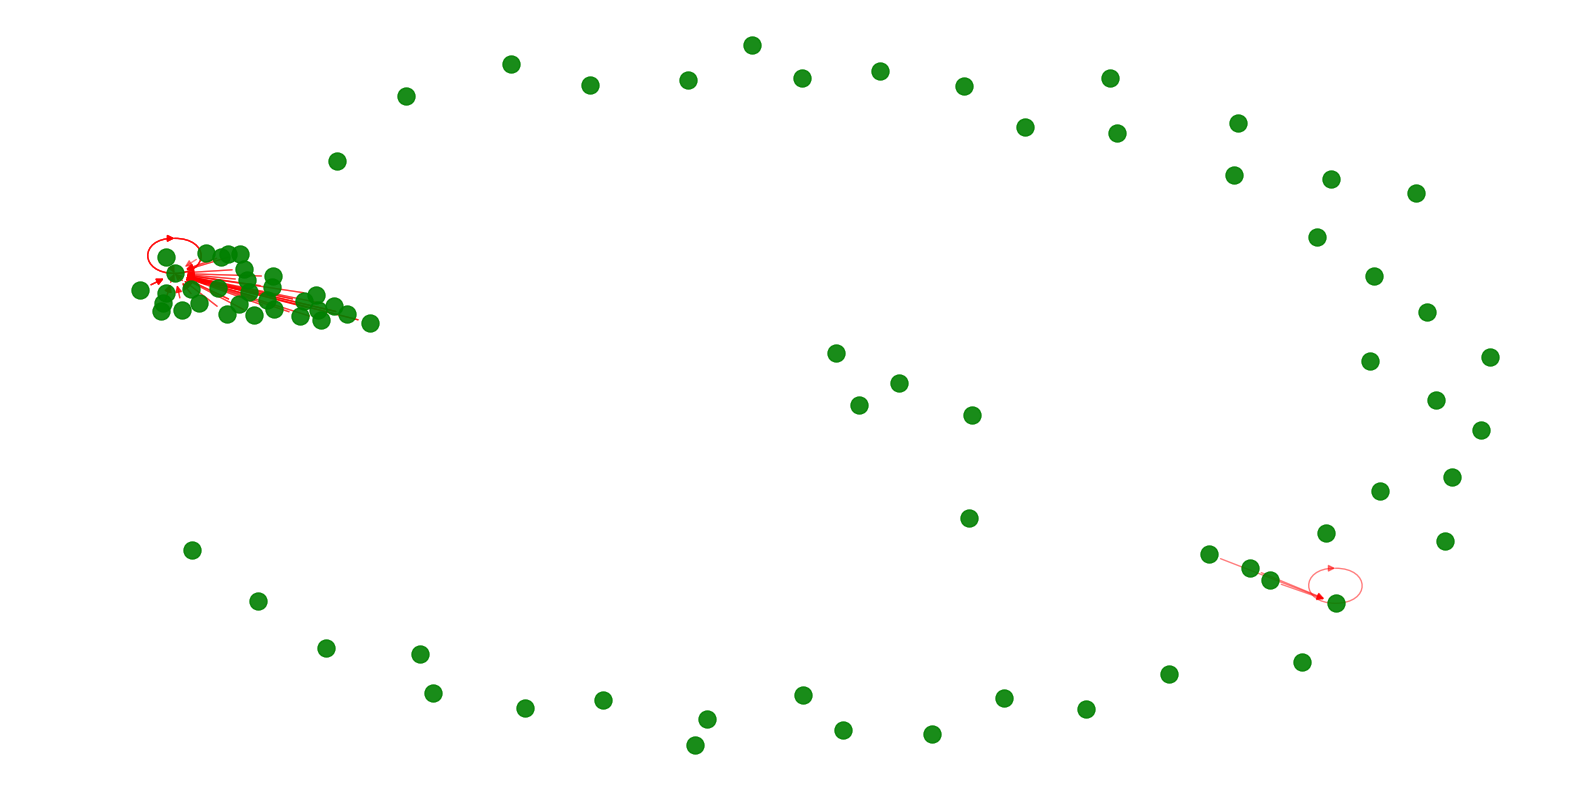

In [18]:
# Predict the edges using the trained model
pred = model.predict(X_train)

# Create a list of predicted edges
pred_edges = [(u, v) for (u, v), p in zip(df_train.iloc[:, :2].values, pred) if p > 0.5]

# Add the predicted edges to the graph
G.add_edges_from(pred_edges)

# Draw the graph with predicted links in a different color
plt.figure(figsize=(20,10))
posn = nx.spring_layout(G)
#nx.draw(G,with_labels=True)
nx.draw_networkx_nodes(G, pos=posn, node_color='green', node_size=150, alpha=0.9)
nx.draw_networkx_edges(G, pos=posn, edge_color='red', alpha=0.5, edgelist=pred_edges)
nx.draw_networkx_labels(G, pos=posn, labels=nx.get_node_attributes(G, 'text'), font_size=10,clip_on=True)
plt.axis('off')
plt.show()


In [19]:
from sklearn.metrics import classification_report

# Get the predicted labels for the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))


7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

     Class 0       0.97      0.95      0.96       200
     Class 1       0.31      0.40      0.35        10

    accuracy                           0.93       210
   macro avg       0.64      0.68      0.66       210
weighted avg       0.94      0.93      0.93       210



7/7 [==============================] - 0s 1ms/step


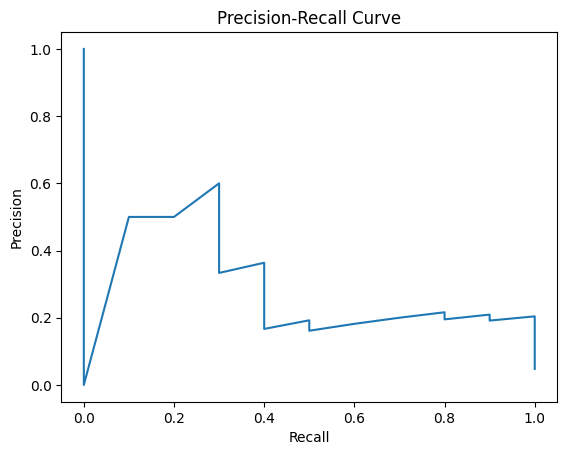

In [20]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predict the probabilities for the test set
y_pred_prob = model.predict(X_test)

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [21]:
print(recall)

[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  0.9 0.9 0.9 0.9 0.8 0.8 0.8 0.8 0.7 0.6 0.5 0.5 0.5 0.5 0.5 0.5 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.3 0.3 0.3 0.2 0.1 0.  0. ]


In [22]:
print(precision)

[0.04761905 0.04854369 0.04901961 0.04950495 0.05128205 0.05181347
 0.05405405 0.05464481 0.05780347 0.06060606 0.06134969 0.06410256
 0.06451613 0.06849315 0.07194245 0.07692308 0.07751938 0.08196721
 0.08849558 0.09433962 0.1010101  0.11111111 0.125      0.14285714
 0.14705882 0.15151515 0.15625    0.16129032 0.16393443 0.16666667
 0.17241379 0.1754386  0.17857143 0.18518519 0.18867925 0.19607843
 0.20408163 0.19148936 0.19565217 0.20454545 0.20930233 0.19512195
 0.20512821 0.21052632 0.21621622 0.2        0.18181818 0.16129032
 0.16666667 0.17241379 0.17857143 0.18518519 0.19230769 0.16666667
 0.17391304 0.19047619 0.21052632 0.23529412 0.26666667 0.28571429
 0.30769231 0.33333333 0.36363636 0.33333333 0.42857143 0.6
 0.5        0.5        0.         1.        ]


In [23]:
from sklearn.metrics import confusion_matrix

# Get the predicted classes
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print(cm)


7/7 [==============================] - 0s 1ms/step
[[191   9]
 [  6   4]]


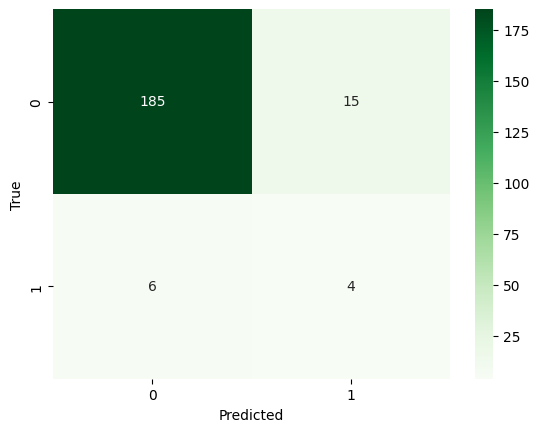

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


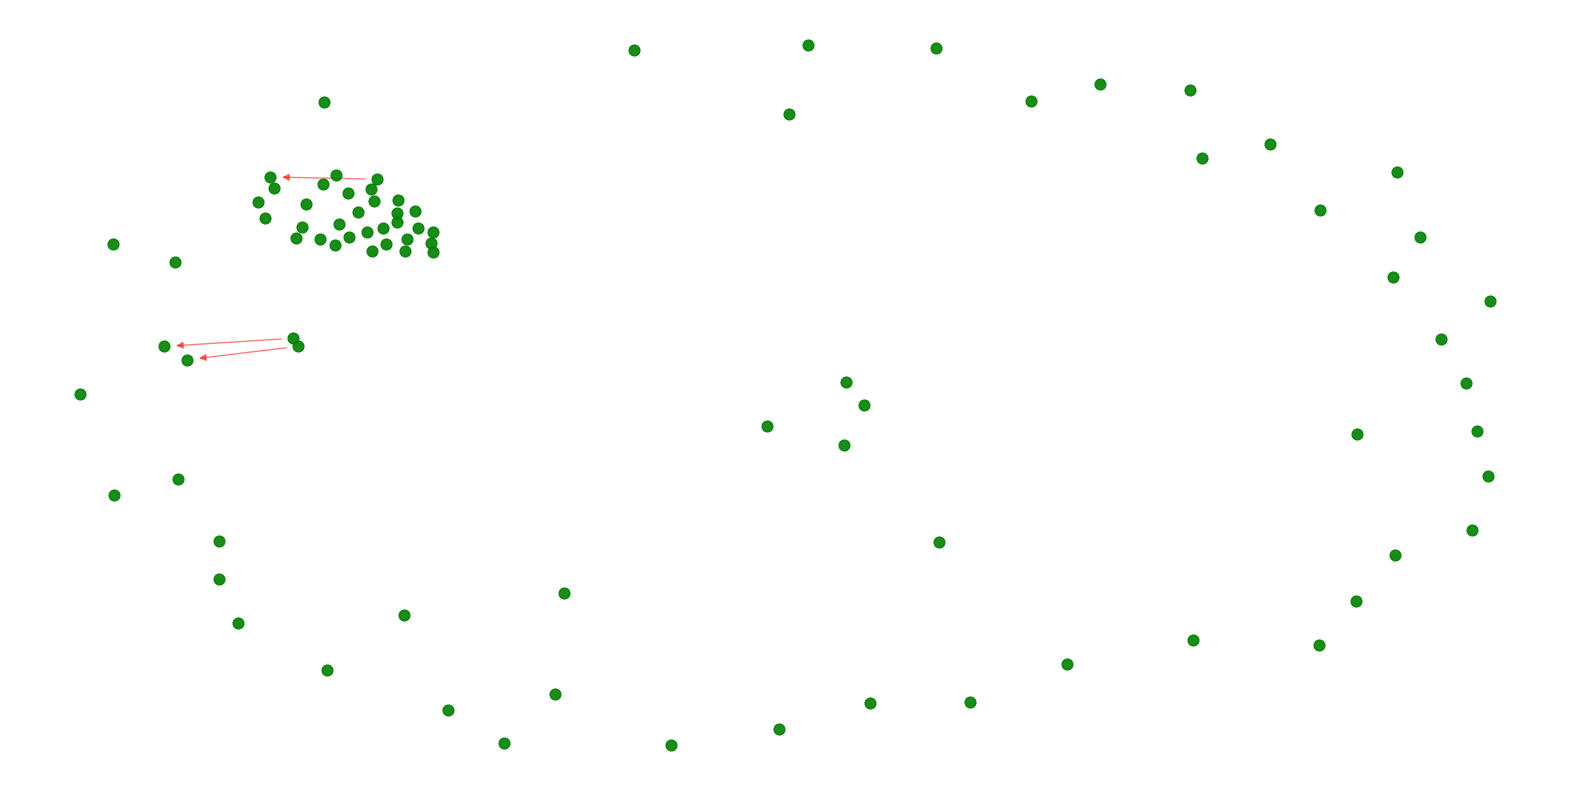

In [25]:
# Suppose `pred_edges` is a list of edges predicted by some algorithm
pred_edges = [(1, 2), (3, 4), (5, 6)]

# Add the predicted edges to the graph
G.add_edges_from(pred_edges)

# Draw the graph with predicted links in a different color
plt.figure(figsize=(20,10))
posn = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=posn, node_color='green', node_size=60, alpha=0.9)
nx.draw_networkx_edges(G, pos=posn, edge_color='red', alpha=0.5, edgelist=pred_edges)
nx.draw_networkx_labels(G, pos=posn, labels=nx.get_node_attributes(G, 'text'), font_size=10)
plt.axis('off')
plt.show()


In [26]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the history of epochs
print(history.history)

7/7 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.9286
{'loss': [0.4173123240470886, 0.21815072000026703, 0.17620813846588135, 0.15958546102046967, 0.15306256711483002, 0.14150218665599823, 0.1469576060771942, 0.137079119682312, 0.12519721686840057, 0.12376455217599869, 0.12991975247859955, 0.12288085371255875, 0.11980809271335602, 0.1153586283326149, 0.11587635427713394, 0.11718790233135223, 0.10881229490041733, 0.10380379110574722, 0.099151611328125, 0.10545291006565094, 0.10741154849529266, 0.10832251608371735, 0.10192851722240448, 0.09957165271043777, 0.09509439021348953, 0.09664816409349442, 0.0963212177157402, 0.09825458377599716, 0.08922252058982849, 0.10053645819425583, 0.09976845979690552, 0.09156910330057144, 0.09645364433526993, 0.08459591120481491, 0.08149424940347672, 0.07962413877248764, 0.07650472968816757, 0.07483630627393723, 0.07681476324796677, 0.08532694727182388, 0.07672512531280518, 0.08422404527664185, 0.07578037679195404, 0.08223854

In [27]:
# Print the training accuracy
print(history.history['accuracy'])

# Print the validation loss
print(history.history['val_loss'])


[0.8269895911216736, 0.9363321661949158, 0.9453287124633789, 0.9525951743125916, 0.9564014077186584, 0.9567474126815796, 0.9529411792755127, 0.9619377255439758, 0.9647058844566345, 0.9633218050003052, 0.9647058844566345, 0.9640138149261475, 0.9660899639129639, 0.9653978943824768, 0.962975800037384, 0.9640138149261475, 0.9681661128997803, 0.9678200483322144, 0.9688581228256226, 0.9692041277885437, 0.9681661128997803, 0.9667820334434509, 0.9688581228256226, 0.9674740433692932, 0.9685121178627014, 0.9702422022819519, 0.9692041277885437, 0.9719723463058472, 0.9712802767753601, 0.9674740433692932, 0.9698961973190308, 0.9726643562316895, 0.9730103611946106, 0.9747405052185059, 0.9757785201072693, 0.9782006740570068, 0.9771626591682434, 0.9799308180809021, 0.9799308180809021, 0.9785467386245728, 0.979238748550415, 0.9775086641311646, 0.9802768230438232, 0.9768165946006775, 0.9778546690940857, 0.9816609025001526, 0.9802768230438232, 0.9806228280067444, 0.9809688329696655, 0.9816609025001526]
[

In [28]:
from sklearn.metrics import classification_report

# Get the predicted labels for the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))


7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

     Class 0       0.97      0.95      0.96       200
     Class 1       0.31      0.40      0.35        10

    accuracy                           0.93       210
   macro avg       0.64      0.68      0.66       210
weighted avg       0.94      0.93      0.93       210



7/7 [==============================] - 0s 1ms/step


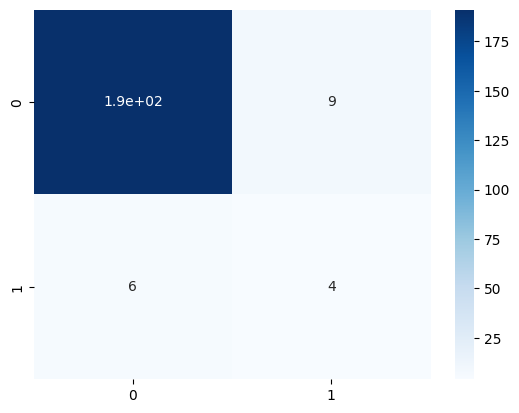

In [29]:
import seaborn as sns

from sklearn.metrics import confusion_matrix

# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [30]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print F1 score
print('F1 score:', f1)


F1 score: 0.34782608695652173


In [31]:
y_pred = model.predict(X_train)


47/47 [==============================] - 0s 868us/step


In [32]:
y_pred_binary = (y_pred > 0.5).astype(int)


In [33]:
def compute_hits(y_true, y_pred, k):
    hits = 0
    for i in range(len(y_true)):
        if y_true[i] in y_pred[i, :k]:
            hits += 1
    return hits / len(y_true)

hits_10 = compute_hits(y_test, y_pred, 10)
hits_100 = compute_hits(y_test, y_pred, 100)
hits_500 = compute_hits(y_test, y_pred, 500)


In [34]:
def compute_mrr(y_true, y_pred):
    mrr = 0
    for i in range(len(y_true)):
        rank = np.where(y_pred[i] == y_true[i])[0]
        if len(rank) > 0:
            mrr += 1 / (rank[0] + 1)
    return mrr / len(y_true)

mrr = compute_mrr(y_test, y_pred)


In [35]:
def compute_amri(y_true, y_pred):
    amri = 0
    for i in range(len(y_true)):
        rank = np.where(y_pred[i] == y_true[i])[0]
        if len(rank) > 0:
            amri += np.exp(-rank[0])
    return amri / len(y_true)

amri = compute_amri(y_test, y_pred)


In [36]:
print('Hits @10:', hits_10)
print('Hits @100:', hits_100)
print('Hits @500:', hits_500)
print('MRR:', mrr)
print('AMRI:', amri)


Hits @10: 0.37142857142857144
Hits @100: 0.37142857142857144
Hits @500: 0.37142857142857144
MRR: 0.37142857142857144
AMRI: 0.37142857142857144
